**Fáza 2 - predspracovanie údajov**

Michaela Hanková, Martin Rudolf

50%:50%

cvičenie: piatok 10:00

dataset: 163

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import scipy.stats as stats
from matplotlib.pyplot import figure 
from sklearn.impute import SimpleImputer
from numpy import isnan
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import category_encoders as ce
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR

Načítanie labor.csv súboru

In [2]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)
data_labor = pd.read_csv("163/labor.csv", sep='\t', index_col=0)
data_labor.head(10)

,leukocyty,ssn,name,smoker,hemoglobin,trombocyty,indicator,alt,relationship,weight,ast,alp,hematokrit,hbver,etytr,er-cv,erytrocyty
0,5.90289,513-95-7625,Andrew Jacobs,no,7.54279,5.83096,1.0,17.60670,widowed,8.09544,42.92870,60.77098,6.50802,5.54259,6.57020,47.78400,5.46395
1,5.56403,025-71-2115,Ian Harrison,Y,7.87747,NaN,1.0,17.78037,single,73.58725,50.25507,47.14780,3.49169,3.52227,4.82276,55.62479,5.37924
2,6.24057,824-63-0108,Matthew Williams,no,4.72650,7.83234,1.0,25.25152,single,129.45079,25.15943,48.53570,8.65913,8.25976,5.64422,48.44629,6.52365
3,5.48374,157-32-2908,Charles Chavez,no,5.43079,5.36911,1.0,18.32802,divoced,18.61698,45.02094,73.77687,9.30190,6.26535,6.23014,50.48872,4.33766
4,6.04784,545-96-1267,Allen Chung MD,yes,8.85943,6.76682,1.0,11.03841,divoced,78.83355,59.06392,17.65112,4.47835,2.28488,7.83874,38.74892,5.17704
5,6.28252,650-34-4074,Ryan Ross,yes,4.75426,5.63045,1.0,6.64453,single,13.81725,57.88057,53.22502,5.06428,6.65377,5.81242,30.40564,3.87343
6,7.21939,056-12-3355,Michael Smith Jr.,no,7.58550,4.71240,1.0,14.50400,single,81.46513,50.44811,61.40911,6.70752,7.41615,5.70049,48.26899,4.54016
7,5.76548,122-89-9380,Carrie Leon,no,6.64563,4.79461,1.0,20.12293,nop,75.56777,37.59277,84.84243,4.28566,5.72836,6.34528,50.74082,4.39400
8,7.58431,694-07-9912,Timothy Johnson,no,7.51638,5.83575,1.0,16.14867,nop,102.10316,48.89961,62.13768,7.38074,6.56424,5.30224,45.32943,3.73263
9,8.26445,142-19-4122,Diamond Dixon,no,7.37812,5.62982,1.0,17.73287,married,83.97892,37.78143,58.64629,3.90996,5.55998,5.56007,51.13681,4.89780


In [3]:
data_profiles = pd.read_csv(r"163/profiles.csv", sep='\t', index_col=0)
data_profiles.head(10)

,job,address,blood_group,ssn,birthdate,residence,race,name,sex
0,Quarry manager,"6269 Kelsey Cove\nJessicahaven, KY 76299",B+,818-49-6074,1925-12-31,"30070 Anderson Branch Suite 371\nHoffmanberg, ...",White,Kimberly Frazier,F
1,Financial risk analyst,"72241 Luna Divide Suite 877\nMelindachester, I...",B+,617-52-9894,"03/21/1912, 00:00:00","61551 Williams Shoal Apt. 506\nLunaborough, VA...",Black,Timothy Gutierrez MD,M
2,Waste management officer,"6554 Nicole Lodge\nNorth Tanner, PA 59584",B+,690-88-6942,1960-11-19,"77305 Palmer Valleys Suite 424\nJennifertown, ...",Black,Elaine Elliott,F
3,Publishing rights manager,"847 Taylor Court Apt. 547\nGutierrezfort, SD 1...",O+,767-13-0171,1978/11/14,"62021 Schwartz Roads\nJaimeville, SD 64413",Black,Richard Anderson,M
4,Medical sales representative,"83815 Richard Causeway Suite 275\nLemouth, WV ...",B+,412-57-1910,"03/14/1995, 00:00:00",Unit 4872 Box 1158\nDPO AA 51410,white,Jennifer Bass,F
5,"Engineer, water","743 Barrett Square\nJoycemouth, MT 91472",A+,504-96-7982,"07/25/1940, 00:00:00","0727 Jason Manor\nNorth Daniel, ID 86192",Hawaiian,Richard Miller,M
6,Lobbyist,"7181 Thompson Islands\nJenniferchester, UT 24929",AB-,687-75-8712,16 Jan 1954,"263 Autumn Valleys Apt. 866\nTracyfurt, NC 53979",Asian,Kevin Cameron,M
7,Theatre stage manager,"86454 Owen Prairie\nBrittanyburgh, ME 24738",B+,894-73-6256,1985-09-08,"40209 Morris Knoll Suite 118\nSmithhaven, OK 7...",black,Todd Olson,M
8,Building control surveyor,"95081 Neal Estate Suite 946\nKarenville, NY 33491",O+,820-23-7751,14 Feb 1959,"715 Derrick Light Apt. 186\nMorganburgh, IN 67154",White,Anthony Walker,M
9,Special educational needs teacher,"6928 Ashley Crest Apt. 360\nPort Brianport, NC...",AB+,229-64-9537,2003/09/17,006 Leblanc Mission Apt. 830\nSouth Nicholasbu...,White,Samantha Dominguez,F


Dataset labor obsahuje nasledujúce problémy:

    - stĺpec smoker obsahuje 4 hodnoty (yes, no, Y, N), ponecháme len dve hodnoty (yes, no)
    
    - V stĺpci relationship sa namiesto divorced vyskytuje divoced, prepíšeme to na divorced

In [4]:
data_labor['smoker'] = data_labor['smoker'].str.replace('Y','yes')
data_labor['smoker'] = data_labor['smoker'].str.replace('N','no')

In [5]:
data_labor['relationship'] = data_labor['relationship'].str.replace('divoced','divorced')

Nachádza sa tu 99 duplicitných riadkov, preto ich vymažeme

In [6]:
data_labor = data_labor.drop_duplicates()

**leukocyty** - biele krvinky

**ssn** - identifikačné číslo každej osoby

**hemoglobin** - červené krvné farbivo

**trombocyty** - krvné doštičky

**indicator** -  1.0 znamená zhoršený zdravotný stav

**ast** - Alaninaminotransferáza, enzým vyskytujúci sa v červených krvinkách aj v pečeni

**alp** - enzým vyskytujúci sa vo všetkých bunkách

**hematokrit** - pomer medzi objemom bunkovej časti krvi a objemom celej krvi

**erytrocyty** - červené krvinky

Načítame si druhý dataset profiles, ktorý obsahuje údaje o pacientoch

Vidíme, že tento dataset obsahuje nasledujúce problémy:

    - v stĺpcoch address a residence sa nachádzajú znaky '\n'
    - nejednotný formát dátumov
    - preklepy a malé začiatočné písmená v stĺpci race

Odstránenie znakov '\n' zo stĺpcov address a residence

In [7]:
# v stĺpcoch address a residence boli v záznamoch znaky '\n' , nahradím tento znak medzerou
data_profiles['address'] = data_profiles['address'].replace(r'\s+|\\n', ' ', regex=True)
data_profiles['residence'] = data_profiles['residence'].replace(r'\s+|\\n', ' ', regex=True)

Nastavenie jednotného formátu pre dátumy

In [8]:
# nastavenie rovnakého formátu pre dátumy
data_profiles['birthdate'] = pd.to_datetime(data_profiles['birthdate'])

V datasete sa nachádzajú tri pomenovania pre 'Black', dve pomenovania pre 'White', preto tieto pomenovania zjednotíme

In [9]:
# upravenie hodnoty v stĺpci 'race' z blsck na Black, black na Black, white na White
data_profiles['race'] = data_profiles['race'].str.replace('blsck','Black')
data_profiles['race'] = data_profiles['race'].str.replace('black','Black')
data_profiles['race'] = data_profiles['race'].str.replace('white','White')

## Spájanie datasetov
Na základe stĺpcu 'ssn' spojíme obidva datasety do jedného veľkého

In [10]:
spojene_datasety = data_labor.set_index('ssn').join(data_profiles.set_index('ssn'), rsuffix = 'name')

In [11]:
spojene_datasety

,leukocyty,name,smoker,hemoglobin,trombocyty,indicator,alt,relationship,weight,ast,...,er-cv,erytrocyty,job,address,blood_group,birthdate,residence,race,namename,sex
ssn,,,,,,,,,,,,,,,,,,,,,
001-39-8129,3.83682,Jennifer Collins,no,9.56763,6.24670,0.0,15.54692,nop,58.77281,61.69072,...,58.65303,4.74667,Freight forwarder,"1289 Jasmine Points Ericchester, NC 86853",A+,1985-05-20,Unit 2108 Box 0811 DPO AA 69761,White,Jennifer Collins,F
001-39-8129,6.77400,Jennifer Collins,no,8.40956,4.84643,1.0,9.87043,nop,89.99721,52.45406,...,47.84938,5.46164,Freight forwarder,"1289 Jasmine Points Ericchester, NC 86853",A+,1985-05-20,Unit 2108 Box 0811 DPO AA 69761,White,Jennifer Collins,F
001-39-8129,5.88895,Jennifer Collins,no,6.88630,4.75481,1.0,17.69935,married,87.14948,32.90293,...,54.89972,4.18967,Freight forwarder,"1289 Jasmine Points Ericchester, NC 86853",A+,1985-05-20,Unit 2108 Box 0811 DPO AA 69761,White,Jennifer Collins,F
001-47-0925,5.25729,Ashley Brown,no,5.94908,5.65149,0.0,16.69380,married,84.34082,44.52169,...,22.22383,5.85584,Ecologist,"3260 Nolan Pine Apt. 217 North Lisafort, GA 83314",O-,1914-02-06,USNV Thomas FPO AP 41411,Black,Ashley Brown,F
001-47-0925,6.17891,Ashley Brown,no,5.32208,6.22941,0.0,13.68382,single,52.63441,41.90184,...,31.47264,5.23573,Ecologist,"3260 Nolan Pine Apt. 217 North Lisafort, GA 83314",O-,1914-02-06,USNV Thomas FPO AP 41411,Black,Ashley Brown,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899-22-9128,4.67257,Alexander Cole,yes,6.78345,4.63196,1.0,19.40180,separated,50.55472,58.80624,...,37.38922,5.27571,Health visitor,USCGC Moyer FPO AA 60131,A+,1957-11-18,"PSC 9135, Box 1712 APO AP 04013",Black,Alexander Cole,M
899-22-9128,7.52463,Alexander Cole,no,8.48905,3.06093,0.0,8.18637,nop,116.40533,49.31383,...,19.85706,4.47694,Health visitor,USCGC Moyer FPO AA 60131,A+,1957-11-18,"PSC 9135, Box 1712 APO AP 04013",Black,Alexander Cole,M
899-70-7336,5.72551,Eric Hall,no,6.06386,5.58251,1.0,13.24772,single,52.35404,47.33771,...,48.05803,6.34158,Art therapist,"65356 Charles Walk Apt. 438 West Cynthia, MO 7...",B-,2014-07-29,"71166 Steven Lodge Apt. 657 Port Zacharyhaven,...",White,Eric Hall,M


## Čistenie a úprava dát
* Po spojení dvoch datasetov do jedného máme 2x stĺpec s menom, jeden z nich vymažeme
* Vytvoríme nový stĺpec "age" ktorý vygenerovnaý z roku narodenia k dnešnemu dátumu - takto vygenerovaný može byť ovplyvnený vekom dátovej vzorky, ako aj dobou zbierania dát, takže možme predpokladať že vek bude o čosi posunutý, no výsledok korelácie voči iným atribútom by tým nemal byť ovplyvnený. Avšak ak by sme na takýchto dátach natrenovali nejaký model a neskor by sme ho použili na dátach kde by vek pacientov nebol posunutý mohol by nastať problém a nemuselo by to úplne sedieť.

In [12]:
spojene_datasety = spojene_datasety.drop(columns = 'namename', axis = 1)

In [13]:
now = pd.Timestamp('now')
spojene_datasety['age'] = (now - spojene_datasety['birthdate']).astype('<m8[Y]') 

In [14]:
df_deleted_dup = spojene_datasety[~spojene_datasety.index.duplicated()]

## **Úprava dát**

***Druhé zadanie***
čo s nulovými hodnotami? niektoré vymazať, niektorým dať priemernú hodnotu

In [15]:
df_deleted_dup.isnull().sum(axis = 0)

leukocyty       13
name             0
smoker           0
hemoglobin      11
trombocyty      11
indicator        0
alt             11
relationship     0
weight           0
ast              9
alp             11
hematokrit      10
hbver            6
etytr            8
er-cv            8
erytrocyty      10
job              0
address          0
blood_group      0
birthdate        0
residence        0
race             0
sex              0
age              0
dtype: int64

13 záznamov nemá údaj o leukocytoch, vymažeme tieto záznamy

In [16]:
df_deleted_dup[df_deleted_dup['leukocyty'].isna()]

,leukocyty,name,smoker,hemoglobin,trombocyty,indicator,alt,relationship,weight,ast,...,er-cv,erytrocyty,job,address,blood_group,birthdate,residence,race,sex,age
ssn,,,,,,,,,,,,,,,,,,,,,
050-17-4020,NaN,Alison Jackson,no,6.89890,6.31708,1.0,15.60375,single,46.69050,63.76460,...,72.07198,4.67977,"Psychologist, forensic","888 Gentry Isle Suite 083 North Deborah, OK 21362",AB+,1994-01-03,"567 Parsons Alley Suite 995 Ryanhaven, VA 68875",Black,F,27.0
165-07-5377,NaN,Jennifer Norman,yes,8.51799,7.07442,0.0,14.57347,nop,86.25472,8.18144,...,57.77638,6.00569,Dance movement psychotherapist,"077 Joel Well South Gregory, MI 59380",A-,2009-02-17,"7936 Melody Ridge Apt. 883 South Catherineton,...",White,F,12.0
167-21-0386,NaN,Gregory Poole,no,5.82985,6.79644,1.0,8.72740,married,67.43713,29.46648,...,39.35322,3.08407,Minerals surveyor,"57907 Anderson Parks Reyesberg, KS 82817",AB-,2006-11-02,"662 Derek Walk Suite 962 West Jillian, HI 37759",White,M,15.0
217-34-3042,NaN,Patricia Brown,no,7.48658,4.31490,1.0,20.05249,married,40.33727,21.98045,...,70.93354,4.95700,"Exhibitions officer, museum/gallery","PSC 7849, Box 9546 APO AA 57567",A-,1987-11-13,"661 Kenneth Extension Suite 947 Port Luiston, ...",White,F,34.0
294-97-7360,NaN,Tara Brown,yes,6.00484,5.92565,1.0,16.88499,divorced,87.03467,58.42289,...,30.94316,6.07851,Technical author,"5235 Heidi Stream Buchananmouth, UT 07420",A+,1988-01-19,"59910 Deanna Flats East Danielstad, AK 46917",White,F,33.0
304-72-0584,NaN,Sara Smith,yes,11.00512,5.49724,0.0,22.30476,single,61.93396,24.83941,...,28.08393,5.39367,"Psychologist, clinical","6305 Jamie Trafficway Doylefort, KS 99103",AB-,2002-05-04,"PSC 3980, Box 8542 APO AA 84305",Black,F,19.0
415-08-2814,NaN,Phillip Rodriguez,yes,8.66276,5.42962,1.0,14.19480,married,149.88153,59.99014,...,47.96724,5.96647,Dealer,"1609 Sean Grove Suite 209 Santoston, VA 83204",O+,1961-07-28,USCGC Walker FPO AP 35879,Black,M,60.0
443-08-0771,NaN,Adam Peters,yes,5.12038,6.95576,1.0,21.90969,widowed,45.77598,62.88085,...,36.80598,4.38074,Software engineer,"350 Raven Cliffs Lake Patrickport, GA 35978",AB-,1909-02-21,"PSC 3911, Box 1563 APO AP 90793",Black,M,112.0
600-51-1034,NaN,Melissa Brewer,no,7.69672,6.10525,1.0,14.69559,divorced,70.84971,38.66650,...,39.87351,5.03525,Medical physicist,USNV Caldwell FPO AA 14994,B+,1948-06-03,"385 Moreno Squares Apt. 997 Lake Craig, TN 98026",White,F,73.0


In [17]:
df_deleted_dup.dropna(subset = ["leukocyty"], inplace=True)

D:\IAU_projekt\env_name\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
# vidime, že už nemáme žiadne NaN hodnoty v leukocytoch
df_deleted_dup[df_deleted_dup['leukocyty'].isna()]

,leukocyty,name,smoker,hemoglobin,trombocyty,indicator,alt,relationship,weight,ast,...,er-cv,erytrocyty,job,address,blood_group,birthdate,residence,race,sex,age
ssn,,,,,,,,,,,,,,,,,,,,,


In [19]:
#rozdelime si dataset na numericke a kategoricke atributy
data_numeric = df_deleted_dup.select_dtypes(include=np.number)
data_cat = df_deleted_dup.select_dtypes(exclude=["number","bool_"])
                                        
print('pocet prazdnych hodnot v numerickom dataframe je: ' + str(data_numeric.isnull().sum().sum()))
print('pocet prazdnych hodnot v kategorickom dataframe je: ' + str(data_cat.isnull().sum().sum()))

pocet prazdnych hodnot v numerickom dataframe je: 94
pocet prazdnych hodnot v kategorickom dataframe je: 0


In [20]:
data_cat

,name,smoker,relationship,job,address,blood_group,birthdate,residence,race,sex
ssn,,,,,,,,,,
001-39-8129,Jennifer Collins,no,nop,Freight forwarder,"1289 Jasmine Points Ericchester, NC 86853",A+,1985-05-20,Unit 2108 Box 0811 DPO AA 69761,White,F
001-47-0925,Ashley Brown,no,married,Ecologist,"3260 Nolan Pine Apt. 217 North Lisafort, GA 83314",O-,1914-02-06,USNV Thomas FPO AP 41411,Black,F
002-70-6472,Heidi Howard,yes,divorced,Records manager,"81491 Williams Inlet Kevinfort, UT 08516",AB+,1911-06-11,"533 Kristen Valley Wilsonland, MI 18374",White,F
002-93-3306,Kimberly Evans,no,divorced,Writer,"11851 Daniels Trace Suite 698 Port Charles, DE...",O+,1958-08-20,"15896 Horne Circle Lewischester, UT 41713",White,F
003-11-9972,Kelsey Sanders,yes,nop,"Merchandiser, retail","PSC 3005, Box 3243 APO AP 20936",B+,1983-07-18,"192 Montgomery Field Suite 016 New Renee, SC 9...",Hawaiian,F
...,...,...,...,...,...,...,...,...,...,...
898-69-8571,Paula Soto,no,nop,Outdoor activities/education manager,"41022 Brown Pike Melindahaven, VT 86415",AB+,2000-12-23,"522 Atkinson Summit Isaacport, KY 34662",Indian,F
898-91-7878,Shannon Peters,yes,separated,Astronomer,USCGC Cobb FPO AA 11696,AB-,2017-11-07,"72093 Williams Junction Lindaland, NY 20849",White,M
898-94-5893,Mark Johnson,no,separated,Industrial/product designer,"0664 Rogers Plain Mannberg, NM 35415",B-,1987-08-07,"473 Lauren Islands North Matthewfort, MI 43760",White,M


In [21]:
data_numeric

,leukocyty,hemoglobin,trombocyty,indicator,alt,weight,ast,alp,hematokrit,hbver,etytr,er-cv,erytrocyty,age
ssn,,,,,,,,,,,,,,
001-39-8129,3.83682,9.56763,6.24670,0.0,15.54692,58.77281,61.69072,10.35575,5.86614,3.88614,4.44669,58.65303,4.74667,36.0
001-47-0925,5.25729,5.94908,5.65149,0.0,16.69380,84.34082,44.52169,84.03852,7.05085,NaN,5.98732,22.22383,5.85584,107.0
002-70-6472,5.51719,NaN,4.71822,0.0,11.54368,108.15439,55.89698,31.56202,6.58267,5.87481,5.79185,57.45359,4.34386,110.0
002-93-3306,6.39455,5.11368,5.52612,0.0,21.08413,120.29022,59.10079,61.80397,8.30631,5.55491,6.37883,47.43760,4.22168,63.0
003-11-9972,5.31163,7.01253,4.58958,1.0,19.42177,31.88486,50.74356,78.94512,8.52457,6.22229,6.62010,47.00514,5.09523,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898-69-8571,6.85620,2.73832,6.88737,0.0,9.02772,33.86805,49.19476,13.87713,8.54965,6.64917,6.50488,54.30509,4.02144,20.0
898-91-7878,4.39391,6.43324,3.54729,1.0,15.57648,3.11531,50.01148,80.18662,4.71060,6.04934,5.36085,55.64717,4.78978,4.0
898-94-5893,5.78418,9.06487,5.18321,1.0,15.55221,48.98956,56.64453,16.87267,6.57521,5.45637,4.93360,56.71153,3.64965,34.0


In [22]:
# oddelime predikovany atribut a vytvorime numpyarray aby sme ho mohli vlozit do simple imputeru 
data = data_numeric.loc[:, data_numeric.columns != 'indicator'].values


# vypiseme pocet chybajucich hodnot
print('Missing: %d' % sum(isnan(data).flatten()))

# vytvorime objekt imputer
imputer = SimpleImputer(strategy='mean')

# imputer fitneme na nase data
imputer.fit(data)

# transformujeme data
data_num_transfered = imputer.transform(data)

# vypiseme pocet chybajucich hodnot transformovanych dat 
print('Missing: %d' % sum(isnan(data_num_transfered).flatten()))

Missing: 94
Missing: 0


Dosadenie hodnôt z numpy array do numerického datasetu

In [23]:
for i in range(len(data_numeric)):
    data_numeric[i:i+1].loc[:, data_numeric.columns != 'indicator'] = data_num_transfered[i]

D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [24]:
data_numeric.head(10)

,leukocyty,hemoglobin,trombocyty,indicator,alt,weight,ast,alp,hematokrit,hbver,etytr,er-cv,erytrocyty,age
ssn,,,,,,,,,,,,,,
001-39-8129,3.83682,9.567630,6.24670,0.0,15.54692,58.77281,61.69072,10.35575,5.86614,3.886140,4.44669,58.65303,4.74667,36.0
001-47-0925,5.25729,5.949080,5.65149,0.0,16.69380,84.34082,44.52169,84.03852,7.05085,5.974547,5.98732,22.22383,5.85584,107.0
002-70-6472,5.51719,6.775087,4.71822,0.0,11.54368,108.15439,55.89698,31.56202,6.58267,5.874810,5.79185,57.45359,4.34386,110.0
002-93-3306,6.39455,5.113680,5.52612,0.0,21.08413,120.29022,59.10079,61.80397,8.30631,5.554910,6.37883,47.43760,4.22168,63.0
003-11-9972,5.31163,7.012530,4.58958,1.0,19.42177,31.88486,50.74356,78.94512,8.52457,6.222290,6.62010,47.00514,5.09523,38.0
003-33-5602,5.30656,5.324330,6.62593,1.0,12.62601,139.07854,19.88176,72.50491,7.82165,8.521850,6.41351,58.00970,5.43179,97.0
004-06-2983,4.66583,7.761250,5.29760,1.0,10.13221,124.22895,42.66307,47.77498,6.24031,7.623300,5.18328,61.75929,3.19429,84.0
005-54-8884,5.99752,7.771750,5.86722,1.0,16.31560,19.20024,60.27132,50.72413,5.86070,6.890720,5.79744,35.89347,4.69258,91.0
006-08-2528,5.06285,6.952540,6.38482,1.0,16.81321,111.12533,25.16089,82.94816,4.74618,4.767030,4.98827,22.59021,5.21800,100.0


## Kódovanie kategorických premenných
Aby sme mohli použiť kategorické dáta na klasifikáciu potrebujeme ich premeniť na numerické. Použijeme rozne kódovania nad stĺpcami nad ktorými to má zmysel. Atribút "smoker" a "sex" zakódujeme pomocou **label encoder** pretože má len 2 hodnoty a tak dostaneme hodnotu 0 alebo 1. Na zakódovanie Atribútov "relationship" a "race" použijeme **One Hot encoder** ktorý výtvorí taký počet stĺpcov koľko je unikátnych hodnôt v dátach daného stĺpca a následne pri každom zázname priradí príznak 1 stĺpcu ktorý prislúcha záznamu v ostatných bude 0. Atribúty "blood_group" a "job" kódujeme metódou **Binary Encoding**. Túto metódu použijeme pretože metódou **One Hot encoder** by nám vzniklo prilíš veľa stĺpcov. Binárne kódovanie funguje tak že najprv nad dátami spustí labal encoding a čísla vygenerované label encodingom prevedie do binárnej sústavy, kde jeden stĺpec je vlastne reprezentácia jedného bitu.

In [25]:
#Kódovanie fajčiarov a pohlavie
encoder = LabelEncoder()
data_cat = data_cat.assign(smoker=lambda data_cat: encoder.fit_transform(data_cat.smoker))
data_cat = data_cat.assign(sex=lambda data_cat: encoder.fit_transform(data_cat.sex))
data_cat.head()

,name,smoker,relationship,job,address,blood_group,birthdate,residence,race,sex
ssn,,,,,,,,,,
001-39-8129,Jennifer Collins,0,nop,Freight forwarder,"1289 Jasmine Points Ericchester, NC 86853",A+,1985-05-20,Unit 2108 Box 0811 DPO AA 69761,White,0
001-47-0925,Ashley Brown,0,married,Ecologist,"3260 Nolan Pine Apt. 217 North Lisafort, GA 83314",O-,1914-02-06,USNV Thomas FPO AP 41411,Black,0
002-70-6472,Heidi Howard,1,divorced,Records manager,"81491 Williams Inlet Kevinfort, UT 08516",AB+,1911-06-11,"533 Kristen Valley Wilsonland, MI 18374",White,0
002-93-3306,Kimberly Evans,0,divorced,Writer,"11851 Daniels Trace Suite 698 Port Charles, DE...",O+,1958-08-20,"15896 Horne Circle Lewischester, UT 41713",White,0
003-11-9972,Kelsey Sanders,1,nop,"Merchandiser, retail","PSC 3005, Box 3243 APO AP 20936",B+,1983-07-18,"192 Montgomery Field Suite 016 New Renee, SC 9...",Hawaiian,0


In [26]:
data_cat = data_cat.drop(['address', 'name', 'residence', 'birthdate'], axis = 'columns')
data_cat.head()

,smoker,relationship,job,blood_group,race,sex
ssn,,,,,,
001-39-8129,0,nop,Freight forwarder,A+,White,0
001-47-0925,0,married,Ecologist,O-,Black,0
002-70-6472,1,divorced,Records manager,AB+,White,0
002-93-3306,0,divorced,Writer,O+,White,0
003-11-9972,1,nop,"Merchandiser, retail",B+,Hawaiian,0


## One Hot Encoding

In [27]:
# kodovanie atributu relationship
encoder = ce.OneHotEncoder(cols='relationship')
encoded_relation = encoder.fit_transform(data_cat.relationship)
encoded_relation.head()

,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6
ssn,,,,,,
001-39-8129,1,0,0,0,0,0
001-47-0925,0,1,0,0,0,0
002-70-6472,0,0,1,0,0,0
002-93-3306,0,0,1,0,0,0
003-11-9972,1,0,0,0,0,0


In [28]:
# kodovanie atributu race
encoder = ce.OneHotEncoder(cols='race')
encoded_race = encoder.fit_transform(data_cat.race)
encoded_race.head()

,race_1,race_2,race_3,race_4,race_5
ssn,,,,,
001-39-8129,1,0,0,0,0
001-47-0925,0,1,0,0,0
002-70-6472,1,0,0,0,0
002-93-3306,1,0,0,0,0
003-11-9972,0,0,1,0,0


## Binary Encoding

In [29]:
# kodovanie atributu blood_group
encoder = ce.BinaryEncoder(cols = ['blood_group'])
encoded_blood = encoder.fit_transform(data_cat.blood_group)
encoded_blood.head()

,blood_group_0,blood_group_1,blood_group_2,blood_group_3
ssn,,,,
001-39-8129,0,0,0,1
001-47-0925,0,0,1,0
002-70-6472,0,0,1,1
002-93-3306,0,1,0,0
003-11-9972,0,1,0,1


In [30]:
encoder = ce.BinaryEncoder(cols = ['job'])
encoded_job = encoder.fit_transform(data_cat.job)
encoded_job.head()

,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9
ssn,,,,,,,,,,
001-39-8129,0,0,0,0,0,0,0,0,0,1
001-47-0925,0,0,0,0,0,0,0,0,1,0
002-70-6472,0,0,0,0,0,0,0,0,1,1
002-93-3306,0,0,0,0,0,0,0,1,0,0
003-11-9972,0,0,0,0,0,0,0,1,0,1


In [31]:
encoded_data_cat = data_cat.merge(encoded_relation, on='ssn').merge(encoded_blood, on='ssn').merge(encoded_race, on='ssn').merge(encoded_job, on='ssn')
encoded_data_cat = encoded_data_cat.drop(['blood_group', 'relationship', 'job', 'race'], axis='columns')
encoded_data_cat.head()

,smoker,sex,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,blood_group_0,blood_group_1,...,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9
ssn,,,,,,,,,,,,,,,,,,,,,
001-39-8129,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
001-47-0925,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
002-70-6472,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
002-93-3306,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
003-11-9972,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


## Odstránenie outlierov
Na odstránenie outlierov sme použili 2 metódy **Standard Deviation Method** a **Interquartile Range Method**. Prvá funguje tak že sa pripočíta a odpočíta od priemeru trojnásobok štandardnej odchýlky a tak dostaneme hornú a dolnú hranicu rozpätia dát. Druhá funguje tak, že od spodného quantilu odpočítame rozdiel horného a dolného vynasobený koeficientom 1,5 a k hornému kvantilu tento vynásobený rozdiel pripočítame, takto dostaneme hornú a dolnú hranicu rozpätia dát podľa ktorej odrežeme outliery tak ako pri prvej metóde.</br> Pri káždej aplikácíi týchto metód si vykreslíme histplot dát a vypíšeme vyšie spomenuté hodnoty. Po odstránení outlierov si vykreslíme histplot z nových dát a porovnáme takisto aj boxplot kde pri každom takomto procese možno pozorovať odstránenie outlierov.

len= 3069
Percentiles: 25th=3.977, 75th=5.517, IQR=1.540
cutoff= 2.3098500000000004 lower= 1.6669699999999996 upper= 7.82657
Non-outlier observations: 3035


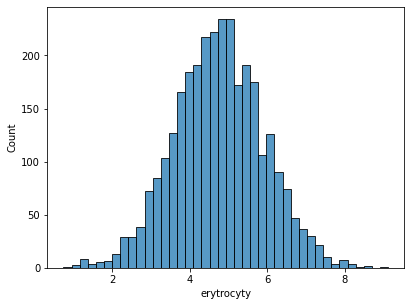

In [32]:
sns.histplot(data_numeric.erytrocyty)
print('len=', len(data_numeric.erytrocyty))

# vypocitame interquartilove rozpatie
q25, q75 = data_numeric.erytrocyty.quantile(0.25), data_numeric.erytrocyty.quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

# vypocet outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# odstranenie outlierov
df_without_outliers = data_numeric[(data_numeric['erytrocyty'] >= lower) & (data_numeric['erytrocyty'] <= upper)]
print('Non-outlier observations: %d' % len(df_without_outliers.erytrocyty))

Max 7.7439
Min 1.66836


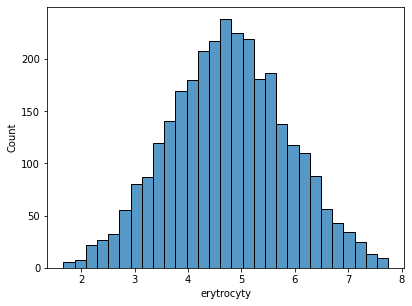

In [33]:
sns.histplot(df_without_outliers.erytrocyty)
print('Max', max(df_without_outliers.erytrocyty))
print('Min', min(df_without_outliers.erytrocyty))

D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='erytrocyty'>

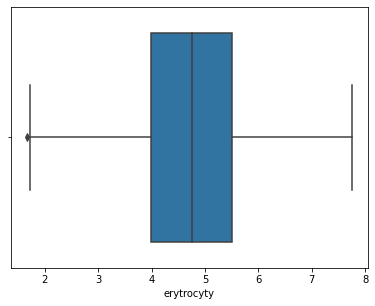

In [34]:
sns.boxplot(df_without_outliers['erytrocyty'])

Pôvodná najvyššia hodnota erytrocytov bola 9.1237, najnižšia 0.74066

Po odstránení outlierov je najvyššia hodnota erytrocytov 7.7439 a najnižšia 1.66836

len= 3069
Percentiles: 25th=5.329, 75th=6.641, IQR=1.312


D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


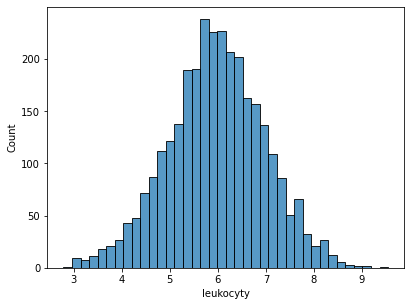

In [35]:
sns.histplot(data_numeric['leukocyty'])
print('len=', len(data_numeric.leukocyty))


# vypocitame interquartilove rozpatie
q25, q75 = data_numeric.leukocyty.quantile(0.25), data_numeric.leukocyty.quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

lave_outliery = q25-1.5*iqr
prave_outliery = q75+1.5*iqr

df_without_outliers.loc[(data_numeric['leukocyty'] < lave_outliery), "leukocyty"] = data_numeric.leukocyty.quantile(0.05)
df_without_outliers.loc[(data_numeric['leukocyty'] > prave_outliery), "leukocyty"] = data_numeric.leukocyty.quantile(0.95)

len= 3035


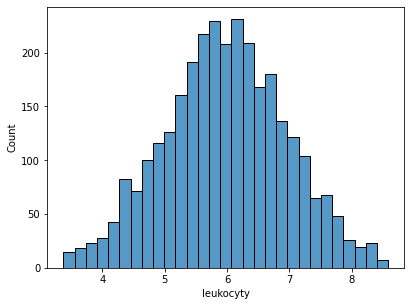

In [36]:
sns.histplot(df_without_outliers['leukocyty'])
print('len=', len(df_without_outliers.leukocyty))

D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='leukocyty'>

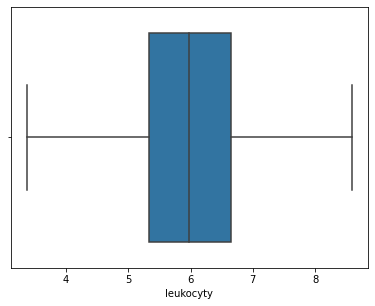

In [37]:
sns.boxplot(df_without_outliers['leukocyty'])

len= 3069
Percentiles: 25th=5.750, 75th=7.918, IQR=2.168


D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


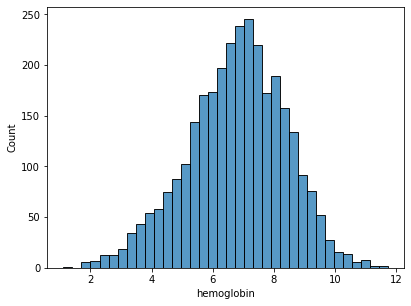

In [38]:
sns.histplot(data_numeric['hemoglobin'])
print('len=', len(data_numeric.hemoglobin))


# vypocitame interquartilove rozpatie
q25, q75 = data_numeric.hemoglobin.quantile(0.25), data_numeric.hemoglobin.quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

lave_outliery = q25-1.5*iqr
prave_outliery = q75+1.5*iqr

df_without_outliers.loc[(data_numeric['hemoglobin'] < lave_outliery), "hemoglobin"] = data_numeric.hemoglobin.quantile(0.05)
df_without_outliers.loc[(data_numeric['hemoglobin'] > prave_outliery), "hemoglobin"] = data_numeric.hemoglobin.quantile(0.95)

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

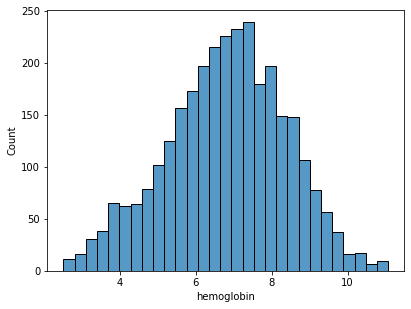

In [39]:
sns.histplot(df_without_outliers.hemoglobin)

Min 2.51547


D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


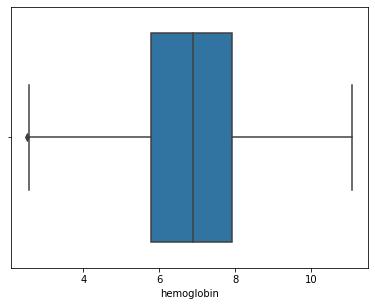

In [40]:
sns.boxplot(df_without_outliers['hemoglobin'])
print('Min', min(df_without_outliers['hemoglobin'])) 

Max 9.37205
Min 2.53432
len= 3069 mean= 5.982637220405493 std= 0.9725511730466682
cutoff= 2.9176535191400044 lower= 3.064983701265489 upper= 8.900290739545497
Non-outlier observations: 3060


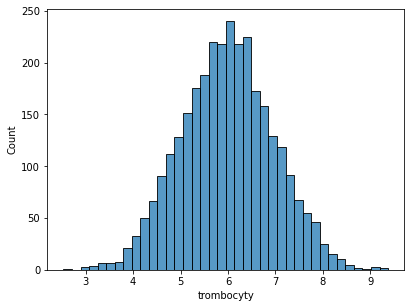

In [41]:
sns.histplot(data_numeric.trombocyty)
print('Max', max(data_numeric.trombocyty))
print('Min', min(data_numeric.trombocyty))

# vypocet priemeru a standardnej odchylky
data_mean, data_std = data_numeric.trombocyty.mean(), data_numeric.trombocyty.std()
print('len=', len(data_numeric.trombocyty), 'mean=', data_mean, 'std=', data_std)

# definovanie outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# odstranenie outlierov
df_without_outliers = data_numeric[(data_numeric['trombocyty'] >= lower) & (data_numeric['trombocyty'] <= upper)]
print('Non-outlier observations: %d' % len(df_without_outliers.trombocyty))


<AxesSubplot:xlabel='trombocyty', ylabel='Count'>

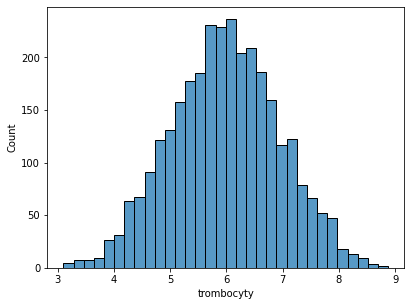

In [42]:
sns.histplot(df_without_outliers.trombocyty)

D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trombocyty'>

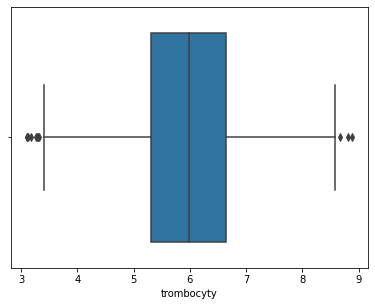

In [43]:
sns.boxplot(df_without_outliers['trombocyty'])

len= 3069
Percentiles: 25th=38.529, 75th=56.165, IQR=17.636


D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\IAU_projekt\env_name\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


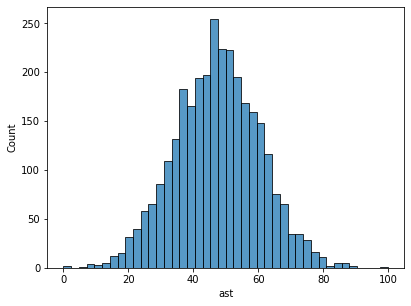

In [44]:
sns.histplot(data_numeric['ast'])
print('len=', len(data_numeric.ast))


# vypocitame interquartilove rozpatie
q25, q75 = data_numeric.ast.quantile(0.25), data_numeric.ast.quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

lave_outliery = q25-1.5*iqr
prave_outliery = q75+1.5*iqr

df_without_outliers.loc[(data_numeric['ast'] < lave_outliery), "ast"] = data_numeric.ast.quantile(0.05)
df_without_outliers.loc[(data_numeric['ast'] > prave_outliery), "ast"] = data_numeric.ast.quantile(0.95)

<AxesSubplot:xlabel='ast', ylabel='Count'>

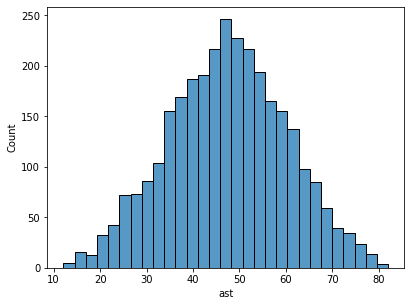

In [45]:
sns.histplot(df_without_outliers['ast'])

Min 12.10401


D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


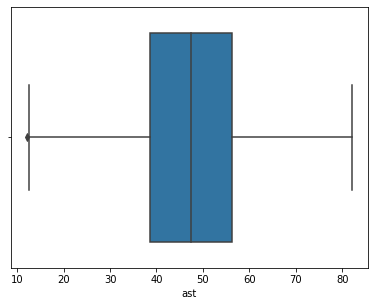

In [46]:
sns.boxplot(df_without_outliers['ast'])
print('Min', min(df_without_outliers['ast'])) 

Max 11.0839
Min 2.31529
len= 3069 mean= 6.388999136972866 std= 1.5958010409042076
cutoff= 4.787403122712623 lower= 1.6015960142602435 upper= 11.176402259685489
Non-outlier observations: 3069


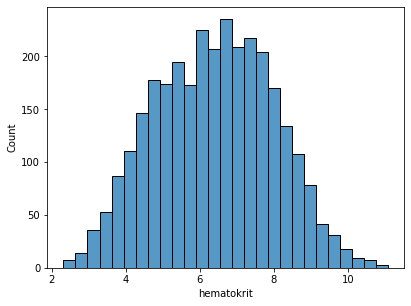

In [47]:
sns.histplot(data_numeric.hematokrit)
print('Max', max(data_numeric.hematokrit))
print('Min', min(data_numeric.hematokrit))

# vypocet priemeru a standardnej odchylky
data_mean, data_std = data_numeric.hematokrit.mean(), data_numeric.hematokrit.std()
print('len=', len(data_numeric.hematokrit), 'mean=', data_mean, 'std=', data_std)

# definovanie outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# odstranenie outlierov
df_without_outliers = data_numeric[(data_numeric['hematokrit'] >= lower) & (data_numeric['hematokrit'] <= upper)]
print('Non-outlier observations: %d' % len(df_without_outliers.hematokrit))


<AxesSubplot:xlabel='hematokrit', ylabel='Count'>

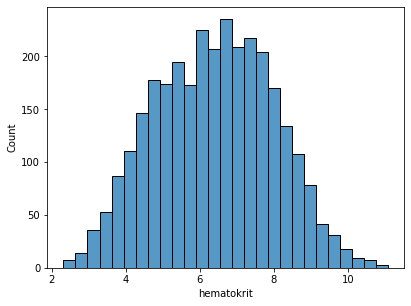

In [48]:
sns.histplot(df_without_outliers['hematokrit'])

Min 2.31529


D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


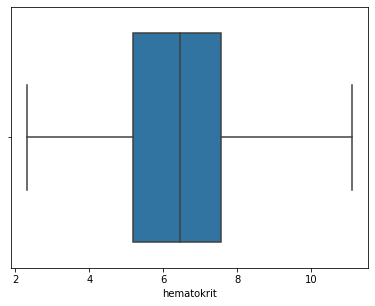

In [49]:
sns.boxplot(df_without_outliers['hematokrit'])
print('Min', min(df_without_outliers['hematokrit'])) 

Max 8.97205
Min 2.40862
len= 3069 mean= 5.914670777523684 std= 0.9991957766080246
cutoff= 2.997587329824074 lower= 2.9170834476996097 upper= 8.912258107347757
Non-outlier observations: 3066


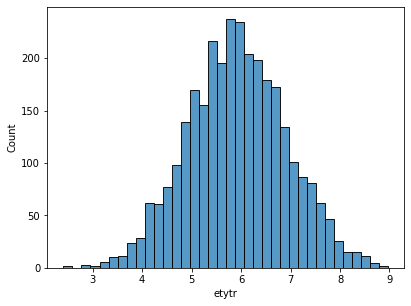

In [50]:
sns.histplot(data_numeric.etytr)
print('Max', max(data_numeric.etytr))
print('Min', min(data_numeric.etytr))

# vypocet priemeru a standardnej odchylky
data_mean, data_std = data_numeric.etytr.mean(), data_numeric.etytr.std()
print('len=', len(data_numeric.etytr), 'mean=', data_mean, 'std=', data_std)

# definovanie outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# odstranenie outlierov
df_without_outliers = data_numeric[(data_numeric['etytr'] >= lower) & (data_numeric['etytr'] <= upper)]
print('Non-outlier observations: %d' % len(df_without_outliers.etytr))

<AxesSubplot:xlabel='etytr', ylabel='Count'>

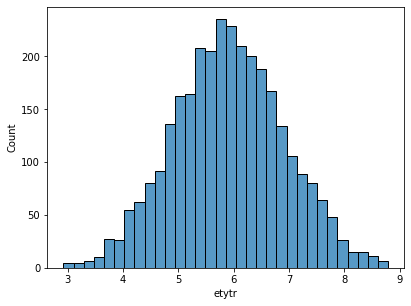

In [51]:
sns.histplot(df_without_outliers.etytr)

D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='etytr'>

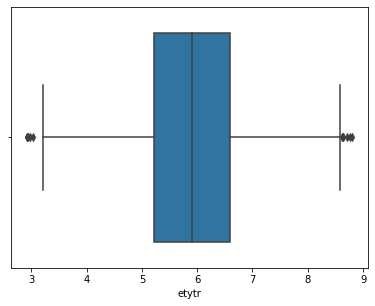

In [52]:
sns.boxplot(df_without_outliers['etytr'])


len= 3069
Percentiles: 25th=12.083, 75th=17.623, IQR=5.540
cutoff= 8.309639999999998 lower= 3.7731600000000025 upper= 25.932199999999998
Non-outlier observations: 3006


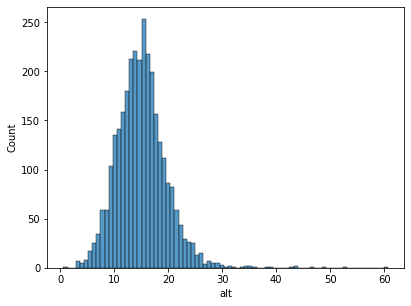

In [53]:
sns.histplot(data_numeric.alt)
print('len=', len(data_numeric.alt))

# vypocitame interquartilove rozpatie
q25, q75 = data_numeric.alt.quantile(0.25), data_numeric.alt.quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

# vypocet outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# odstranenie outlierov
df_without_outliers = data_numeric[(data_numeric['alt'] >= lower) & (data_numeric['alt'] <= upper)]
print('Non-outlier observations: %d' % len(df_without_outliers.alt))

<AxesSubplot:xlabel='alt', ylabel='Count'>

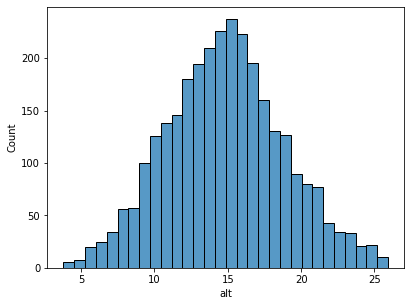

In [54]:
sns.histplot(df_without_outliers.alt)

D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alt'>

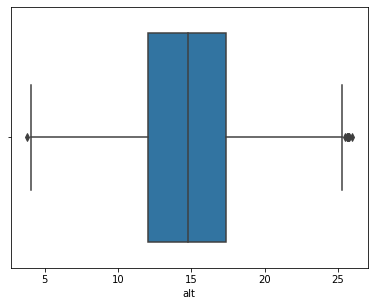

In [55]:
sns.boxplot(df_without_outliers['alt'])

len= 3069
Percentiles: 25th=4.774, 75th=7.209, IQR=2.435
cutoff= 3.6532349999999996 lower= 1.1206250000000004 upper= 10.862585
Non-outlier observations: 3068


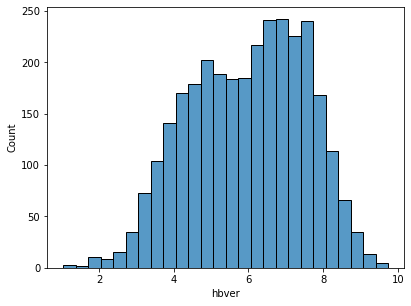

In [56]:
sns.histplot(data_numeric.hbver)
print('len=', len(data_numeric.hbver))

# vypocitame interquartilove rozpatie
q25, q75 = data_numeric.hbver.quantile(0.25), data_numeric.hbver.quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

# vypocet outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# odstranenie outlierov
df_without_outliers = data_numeric[(data_numeric['hbver'] >= lower) & (data_numeric['hbver'] <= upper)]
print('Non-outlier observations: %d' % len(df_without_outliers.hbver))


<AxesSubplot:xlabel='hbver', ylabel='Count'>

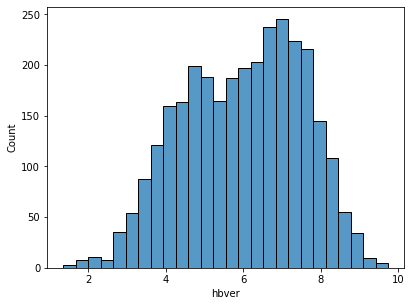

In [57]:
sns.histplot(df_without_outliers.hbver)

D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hbver'>

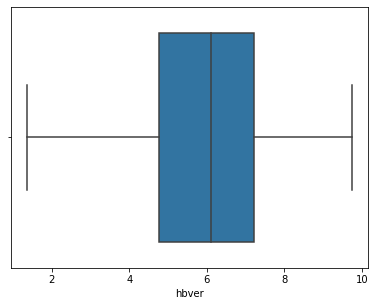

In [58]:
sns.boxplot(df_without_outliers.hbver)

Max 100.0
Min 1.3054
len= 3069 mean= 47.728517879777854 std= 13.24342249195887
cutoff= 39.730267475876616 lower= 7.998250403901238 upper= 87.45878535565447
Non-outlier observations: 3062


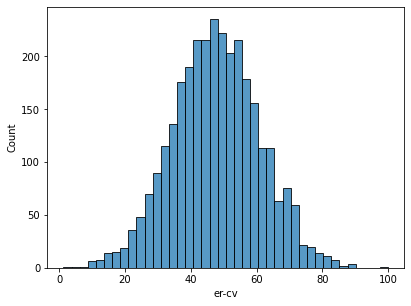

In [59]:
sns.histplot(data_numeric['er-cv'])
print('Max', max(data_numeric['er-cv']))
print('Min', min(data_numeric['er-cv']))

# vypocet priemeru a standardnej odchylky
data_mean, data_std = data_numeric['er-cv'].mean(), data_numeric['er-cv'].std()
print('len=', len(data_numeric['er-cv']), 'mean=', data_mean, 'std=', data_std)

# definovanie outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# odstranenie outlierov
df_without_outliers = data_numeric[(data_numeric['er-cv'] >= lower) & (data_numeric['er-cv'] <= upper)]
print('Non-outlier observations: %d' % len(df_without_outliers['er-cv']))


<AxesSubplot:xlabel='er-cv', ylabel='Count'>

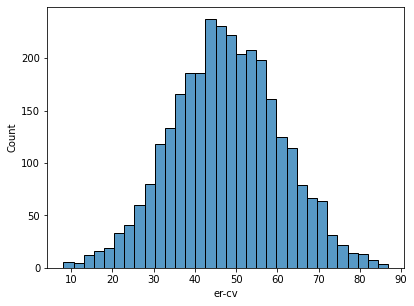

In [60]:
sns.histplot(df_without_outliers['er-cv'])

D:\IAU_projekt\env_name\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='er-cv'>

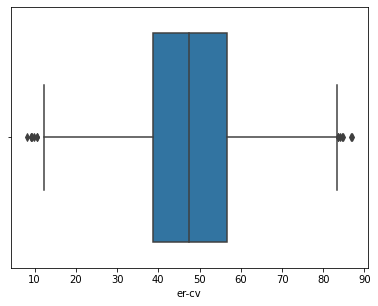

In [61]:
sns.boxplot(df_without_outliers['er-cv'])

Nakoniec dropneme stĺpce s ktorými nemá zmysel pracovať, ich problém sme si rozobrali v prieskumnej analýze.

In [62]:
#dropneme nepotrebne stlpce
clean_numeric = df_without_outliers.drop(['alp', 'weight', 'age'], axis='columns')
clean_numeric

,leukocyty,hemoglobin,trombocyty,indicator,alt,ast,hematokrit,hbver,etytr,er-cv,erytrocyty
ssn,,,,,,,,,,,
001-39-8129,3.83682,9.567630,6.24670,0.0,15.54692,61.69072,5.86614,3.886140,4.44669,58.65303,4.74667
001-47-0925,5.25729,5.949080,5.65149,0.0,16.69380,44.52169,7.05085,5.974547,5.98732,22.22383,5.85584
002-70-6472,5.51719,6.775087,4.71822,0.0,11.54368,55.89698,6.58267,5.874810,5.79185,57.45359,4.34386
002-93-3306,6.39455,5.113680,5.52612,0.0,21.08413,59.10079,8.30631,5.554910,6.37883,47.43760,4.22168
003-11-9972,5.31163,7.012530,4.58958,1.0,19.42177,50.74356,8.52457,6.222290,6.62010,47.00514,5.09523
...,...,...,...,...,...,...,...,...,...,...,...
898-69-8571,6.85620,2.738320,6.88737,0.0,9.02772,49.19476,8.54965,6.649170,6.50488,54.30509,4.02144
898-91-7878,4.39391,6.433240,3.54729,1.0,15.57648,50.01148,4.71060,6.049340,5.36085,55.64717,4.78978
898-94-5893,5.78418,9.064870,5.18321,1.0,15.55221,56.64453,6.57521,5.456370,4.93360,56.71153,3.64965


## Transformácia dat

### Data Standardization
Jednu metódu na transformáciu dát sme zvolili Z-normalizáciu alebo Standard scaling. Táto transformácia je vhodná ak sú dáta normalového rozloženia, náše dáta túto podmienku splňajú. Táto metóda vycentruje naše dáta okolo hodnoty 0. Funguje na tejto funkcii: z = (x - u) / s</br>
x - dáta</br>
u - priemer dát</br>
s - odchýlka</br>

In [63]:
X = clean_numeric[clean_numeric.columns.difference(['indicator'])]
y = clean_numeric['indicator']

array([[<AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'etytr'}>,
        <AxesSubplot:title={'center':'hbver'}>],
       [<AxesSubplot:title={'center':'hematokrit'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'leukocyty'}>],
       [<AxesSubplot:title={'center':'trombocyty'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

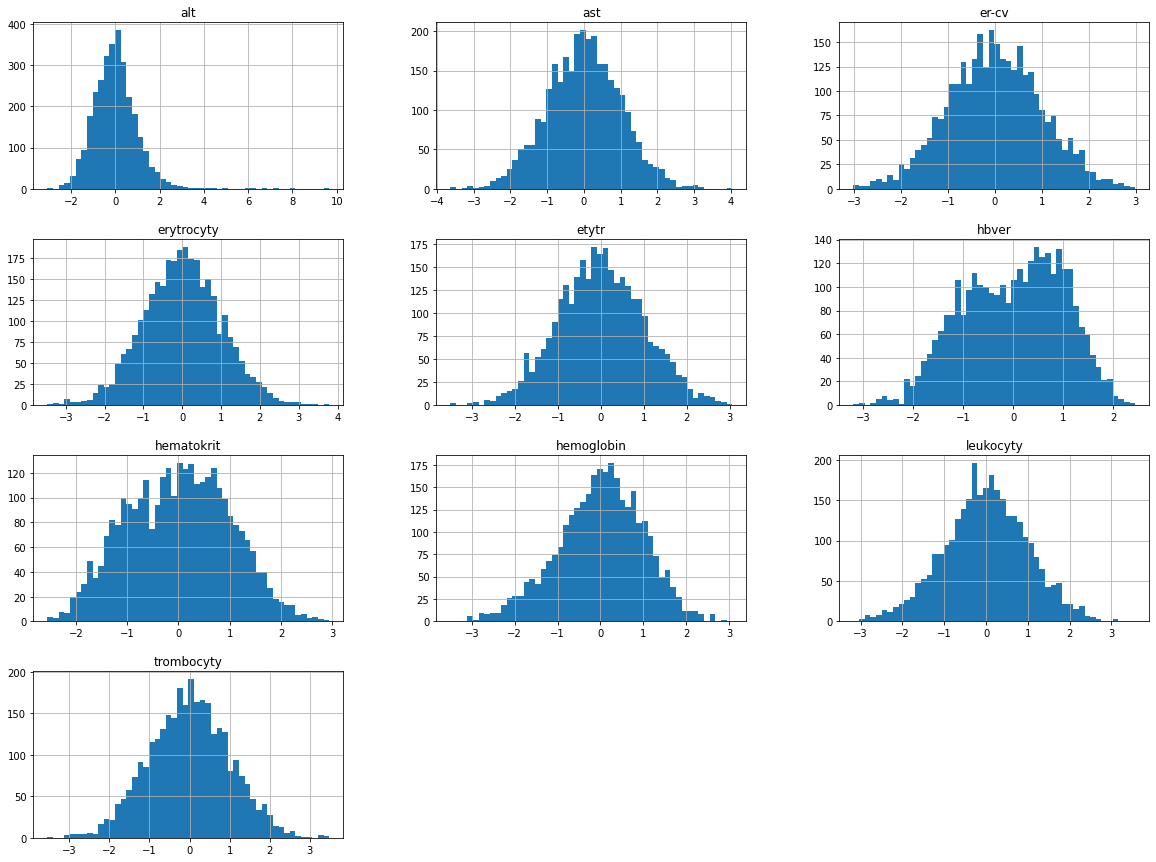

In [64]:
scaler = StandardScaler()

X_standard = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns = X.columns, )
plt.rcParams['figure.figsize'] = 20, 15
X_standard.hist(bins=50)

### Ďalšia transformácia

Druhý typ transformácie, ktorú sme skúsili, je Min-Max transformácia, ktorá zmení hodnoty na hodnoty v intervale <0.0, 1.0>

array([[<AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'etytr'}>,
        <AxesSubplot:title={'center':'hbver'}>],
       [<AxesSubplot:title={'center':'hematokrit'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'leukocyty'}>],
       [<AxesSubplot:title={'center':'trombocyty'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

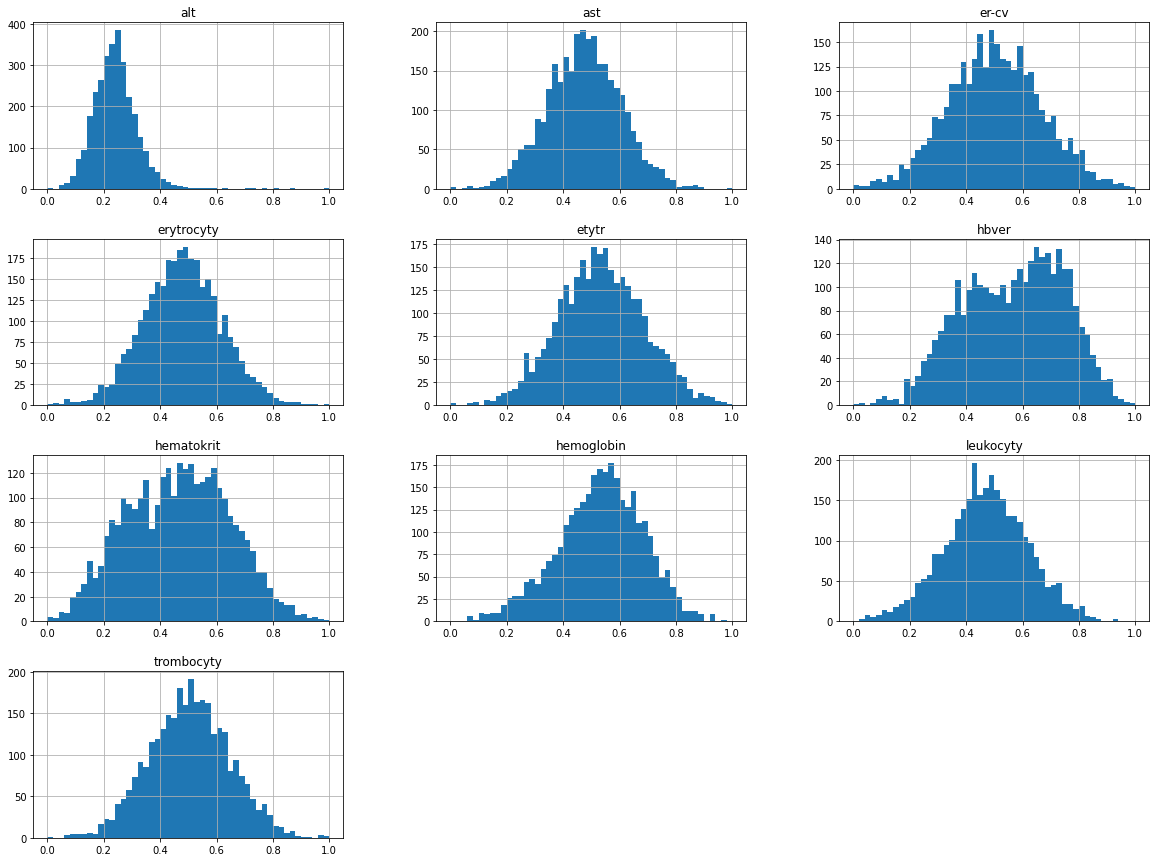

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns = X.columns)
X_scaled.hist(bins=50)

## Rozdelenie datasetu na trénovaciu a testovaciu množinu v pomere 70:30

In [66]:
#spojime vycistene a vyskalovane numericke a encodovane kategoricke data
transformed_data = X_standard.merge(encoded_data_cat, on='ssn').merge(y, on='ssn')

In [67]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(transformed_data, test_size=0.3)

print(f"Počet záznamov v trénovacej množine: {training_data.shape[0]}")
print(f"Počet záznamov v testovacej množine: {testing_data.shape[0]}")

Počet záznamov v trénovacej množine: 2143
Počet záznamov v testovacej množine: 919


In [68]:
training_data

,alt,ast,er-cv,erytrocyty,etytr,hbver,hematokrit,hemoglobin,leukocyty,trombocyty,...,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,indicator
ssn,,,,,,,,,,,,,,,,,,,,,
007-61-0064,0.506787,-0.543929,1.274096,0.331008,1.713917,-0.074878,-1.287209,0.251931,-2.828446,0.037580,...,0,0,0,0,0,1,1,0,0,0.0
814-10-8088,-1.076702,-0.204266,0.041033,-0.559173,0.385370,0.554011,-0.493804,-0.433325,-0.644773,1.394008,...,1,1,1,0,1,1,0,0,0,1.0
765-35-3591,-0.153966,1.176381,1.692504,-1.160872,1.527892,-0.407815,1.137993,0.406556,0.302318,-2.202792,...,1,0,0,1,1,1,0,1,1,1.0
437-84-9589,-1.811504,0.350347,0.446066,-0.386395,-0.818748,0.637942,1.402783,-2.330450,0.685227,-0.173185,...,0,1,0,1,1,0,0,1,1,0.0
002-93-3306,1.268504,0.898247,-0.019001,-0.458765,0.464385,-0.272240,1.200423,-1.027682,0.427946,-0.470407,...,0,0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351-92-4900,-1.563364,-2.014269,0.624793,-1.229216,-0.011841,-1.478355,-0.244919,-1.774041,-1.608777,-0.543446,...,0,0,0,0,1,0,1,1,0,0.0
087-18-3109,0.611188,-0.403791,1.442685,0.382619,-0.160741,0.259146,0.165055,0.891579,-0.630354,0.932189,...,0,1,0,0,1,0,1,1,0,1.0
267-40-8156,0.105586,0.934564,0.448158,0.690216,0.142215,0.331769,1.223720,-0.189929,-0.457009,0.384222,...,1,0,0,0,1,1,0,0,0,1.0


## Feature Selection
### Recursive feature elimination (RFE)
Na výber informatívnych atribútov k atribútu "indikátor" pre strojové učenie použíjeme metódu RFE. Táto technika využíva externý prediktor k určeniu dôležitosti atribútov pre predikciu. Pri tejto metóde postupujeme následovne: Najprv skúšame so všetkými atribútmi a pomocou externého prediktoru zbehneme klasifikáciu a zapíšeme úspešnosť klasifikácie. Ďalej vyhodnotíme dôležitosť atribútov na základe hodnôt ktoré nám táto metóda poskytne a vyhodíme tie ktoré majú najväčšiu hodnotu. Takto to robíme dokola kým nedostaneme sa nám úspešnosť predikcie nezhorší.

In [69]:
#oddelime predikovanu crtu od zvysku dataframu
X = training_data[training_data.columns.difference(['indicator'])]
y = training_data['indicator']

RFE nám vyberie 5 informatívnych atribútov k atribútu indicator

In [70]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector_support = selector.support_
print(selector.support_)
print(selector.ranking_)

[False False False False False False False  True False  True  True  True
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False]
[ 8 32  3 26 33  5 17  1 20  1  1  1  6 24  9 25  1  7 11 22 14 29 28 12
  4  2 13 21 16 27 23 15 31 30 19 10 18]


In [71]:
true_false=pd.DataFrame(selector.support_, index=X.columns, columns=['Rank'])

Stĺpce, ktoré budeme ďalej používať si uložíme do poľa columns_to_keep

In [72]:
columns_to_keep = X.columns.values[true_false['Rank']]
columns_to_keep

array(['erytrocyty', 'hbver', 'hematokrit', 'hemoglobin', 'job_4'],
      dtype=object)

Výpis stĺpcov, ktoré si necháme

In [73]:
true_false

,Rank
alt,False
ast,False
blood_group_0,False
blood_group_1,False
blood_group_2,False
blood_group_3,False
er-cv,False
erytrocyty,True
etytr,False
hbver,True


Ak sa medzi informatívnymi atribútmi nachádza niektorý zo stĺpcov job_1, job_2..., relationship_1, relationship_2...,
blood_group_1, blood_group_2..., race_1, race_2, všetky stĺpce, ktoré obsahujú prefix job, relationship, blood_group,
race prepíšeme tiež na informatívny atribút (to je taký, ktorý má v dataframe true_false v stĺpci Rank hodnotu True)

In [74]:
job_v_atributoch = any("job" in string for string in columns_to_keep)
relationship_v_atributoch = any("relationship" in string for string in columns_to_keep)
blood_group_v_atributoch = any("blood_group" in string for string in columns_to_keep)
race_v_atributoch = any("race" in string for string in columns_to_keep)

if job_v_atributoch == False:
    print('Práca sa nenachádza medzi informatívnymi atribútmi')
else:
    print('Práca sa nachádza medzi informatívnymi atribútmi, všetky encoded stĺpce súvisiace s prácou pridáme medzi '
          'informatívne atribúty')
    i=0
    for index, row in true_false.iterrows():
        job_na_indexe = False
        job_na_indexe = any("job" in index for string in true_false.index[i])
        if(job_na_indexe):
            true_false.iloc[i] = True
        i+=1 
    
    
    
if relationship_v_atributoch == False:
     print('Vzťah sa nenachádza medzi informatívnymi atribútmi')
else:
    print('Vzťah sa nachádza medzi informatívnymi atribútmi, všetky encoded stĺpce súvisiace so vzťahom pridáme medzi '
          'informatívne atribúty')
    i=0
    for index, row in true_false.iterrows():
        relationship_na_indexe = False
        relationship_na_indexe = any("relationship" in index for string in true_false.index[i])
        if(relationship_na_indexe):
            true_false.iloc[i] = True
        i+=1 
        
if blood_group_v_atributoch == False:
     print('Krvná skupina sa nenachádza medzi informatívnymi atribútmi')
else:
    print('Krvná skupina sa nachádza medzi informatívnymi atribútmi, všetky encoded stĺpce súvisiace s krvnou skupinou '
          'pridáme medzi informatívne atribúty')
    i=0
    for index, row in true_false.iterrows():
        blood_group_na_indexe = False
        blood_group_na_indexe = any("blood_group" in index for string in true_false.index[i])
        if(blood_group_na_indexe):
            true_false.iloc[i] = True
        i+=1   
        
if race_v_atributoch == False:
     print('Rasa sa nenachádza medzi informatívnymi atribútmi')
else:
    print('Rasa sa nachádza medzi informatívnymi atribútmi, všetky encoded stĺpce súvisiace s rasou pridáme medzi '
          'informatívne atribúty')
    i=0
    for index, row in true_false.iterrows():
        race_na_indexe = False
        race_na_indexe = any("race" in index for string in true_false.index[i])
        if(race_na_indexe):
            true_false.iloc[i] = True
        i+=1     
    

Práca sa nachádza medzi informatívnymi atribútmi, všetky encoded stĺpce súvisiace s prácou pridáme medzi informatívne atribúty
Vzťah sa nenachádza medzi informatívnymi atribútmi
Krvná skupina sa nenachádza medzi informatívnymi atribútmi
Rasa sa nenachádza medzi informatívnymi atribútmi


Vidíme, že medzi informatívne atribúty patria nasledujúce stĺpce: hbver, hematokrit, hemoglobin. Keďže sa nám menia pri každom zbehnutí notebooku riadky v trénovacej sade, niekedy sa ako 5. atribút vyberie blood_group, job, rasa

In [75]:
true_false

,Rank
alt,False
ast,False
blood_group_0,False
blood_group_1,False
blood_group_2,False
blood_group_3,False
er-cv,False
erytrocyty,True
etytr,False
hbver,True


Vypíšeme si stĺpce, ktoré odstránime

In [76]:
columns_to_remove = X.columns.values[np.logical_not(true_false['Rank'])]
columns_to_remove

array(['alt', 'ast', 'blood_group_0', 'blood_group_1', 'blood_group_2',
       'blood_group_3', 'er-cv', 'etytr', 'leukocyty', 'race_1', 'race_2',
       'race_3', 'race_4', 'race_5', 'relationship_1', 'relationship_2',
       'relationship_3', 'relationship_4', 'relationship_5',
       'relationship_6', 'sex', 'smoker', 'trombocyty'], dtype=object)

Vypíšeme si ostávajúce stĺpce v training_data

In [77]:
training_data = training_data.drop(columns=columns_to_remove)

In [78]:
training_data

,erytrocyty,hbver,hematokrit,hemoglobin,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,indicator
ssn,,,,,,,,,,,,,,,
007-61-0064,0.331008,-0.074878,-1.287209,0.251931,0,0,0,0,0,0,1,1,0,0,0.0
814-10-8088,-0.559173,0.554011,-0.493804,-0.433325,0,1,1,1,0,1,1,0,0,0,1.0
765-35-3591,-1.160872,-0.407815,1.137993,0.406556,0,1,0,0,1,1,1,0,1,1,1.0
437-84-9589,-0.386395,0.637942,1.402783,-2.330450,0,0,1,0,1,1,0,0,1,1,0.0
002-93-3306,-0.458765,-0.272240,1.200423,-1.027682,0,0,0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351-92-4900,-1.229216,-1.478355,-0.244919,-1.774041,1,0,0,0,0,1,0,1,1,0,0.0
087-18-3109,0.382619,0.259146,0.165055,0.891579,0,0,1,0,0,1,0,1,1,0,1.0
267-40-8156,0.690216,0.331769,1.223720,-0.189929,0,1,0,0,0,1,1,0,0,0,1.0


Na heatmape vidíme, že najdôležitejší atribút pre indicator hemoglobín, nasleduje hematokrit, erytrocyty, pretože sú najviac vzdialené od čísla 0 (žiadna korelácia)

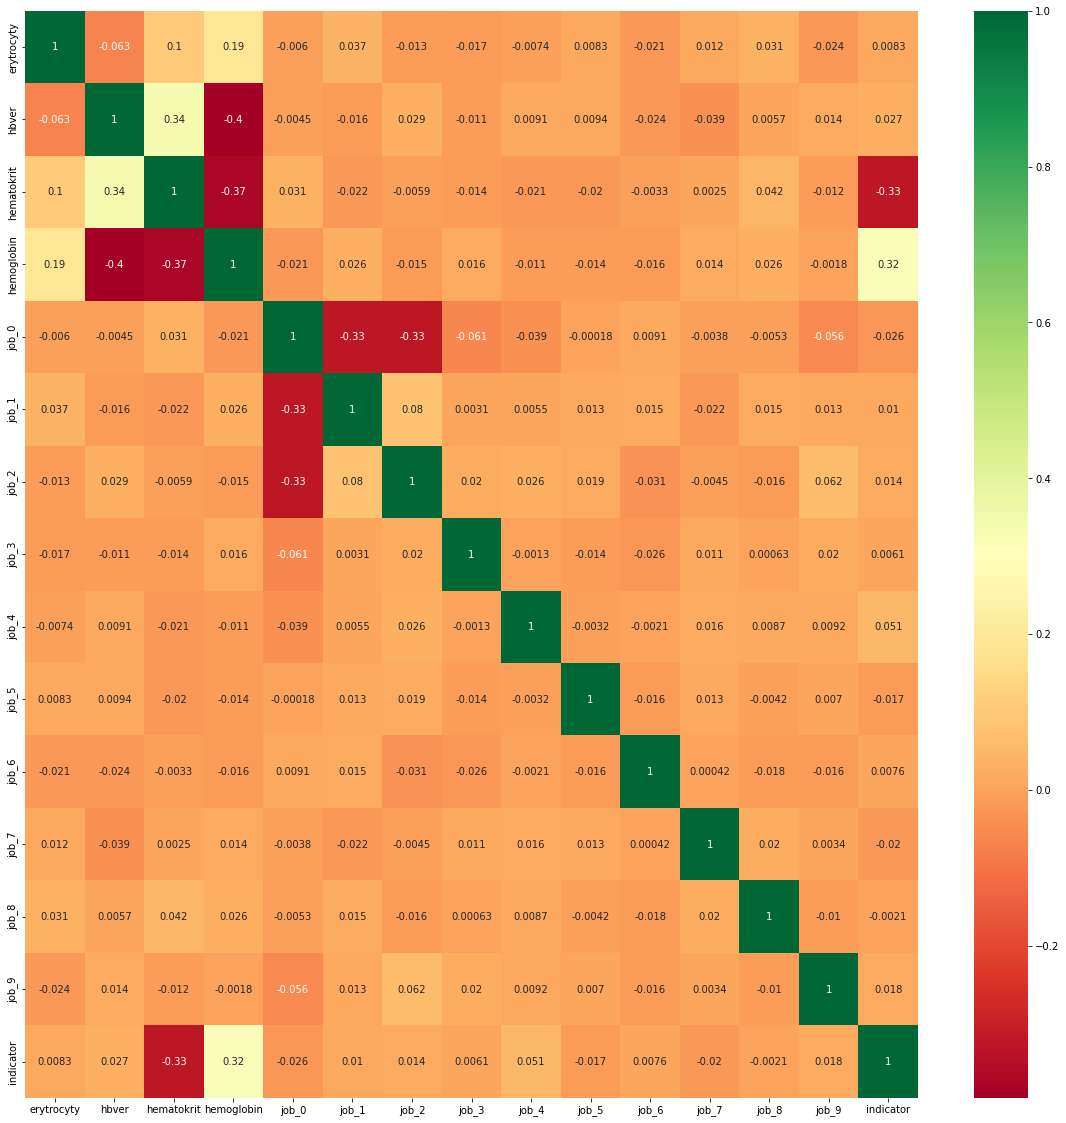

In [79]:
corrmat = training_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
#plot heat map
g=sns.heatmap(training_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Upratanie kodu do pipelines 

In [80]:
df = df_deleted_dup
cat_cols_ohe = list(df.dtypes[df.dtypes == 'object'].index.values)
num_cols = list(df.dtypes[df.dtypes != 'object'].index.values)
num_cols.remove('indicator')
num_cols.remove('age')
num_cols.remove('birthdate')
num_cols.remove('weight')
cat_cols_ohe.remove('name')
cat_cols_ohe.remove('residence')
cat_cols_ohe.remove('address')
cat_cols_ohe.remove('sex')
cat_cols_ohe.remove('smoker')
cat_cols_lbl = ['smoker', 'sex']
print(cat_cols_ohe)
print(cat_cols_lbl)
print(num_cols)

['relationship', 'job', 'blood_group', 'race']
['smoker', 'sex']
['leukocyty', 'hemoglobin', 'trombocyty', 'alt', 'ast', 'alp', 'hematokrit', 'hbver', 'etytr', 'er-cv', 'erytrocyty']


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

column_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical, num_cols),
        ('cat_ohe', OneHotEncoder(), cat_cols_ohe),
        ('cat_lbl', LabelEncoder(), cat_cols_lbl)])

clf = Pipeline(steps=[('preprocessor', column_preprocessor),
                      ('RFE', RFE(SVR(kernel="linear")))])

In [82]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['leukocyty', 'hemoglobin',
                                                   'trombocyty', 'alt', 'ast',
                                                   'alp', 'hematokrit', 'hbver',
                                                   'etytr', 'er-cv',
                                                   'erytrocyty']),
                                                 ('cat_ohe', OneHotEncoder(),
                                                  ['relationship', 'job',
                                                   'blood_group', 'race']),
                                                 ('cat_lbl', LabelEncoder(),
                                                  ['smoker', 'sex'])])),
                ('RFE', RFE(estimator=SVR(kernel='linear')))])

**Vloženie dát do .csv súboru**

In [83]:
training_data.to_csv(r'163\vystupny_subor_faza2.csv')